In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
bus_data = pd.read_excel("12C_deneme.xlsx")

In [3]:
bus_data = bus_data.drop(["FZG Nr.", "Kunde" , "Seri_Open" , "Task_WorkLoad" ], axis=1 )
bus_data

,Referance,Bund,KSW,Task,Land,Time
0,NO,1,56,52,BRD,1160
1,NO,9,36,28,POLEN,1310
2,YES,6,55,4,FR,780
3,NO,1,16,0,Vorfuehrbus,1510
4,NO,1,23,7,BRD,495
5,NO,5,62,18,BRD,965
6,NO,6,54,63,FR,1271
7,NO,2,39,30,FR,1080
8,YES,51,160,25,FR,3194
9,NO,3,126,34,SCHWEIZ,2080


In [4]:
bus_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bund,50.0,7.16,9.974171,1.0,2.00,3.0,8.00,51.0
KSW,50.0,67.20,45.138788,4.0,36.50,54.5,101.00,194.0
Task,50.0,37.52,45.128949,0.0,11.25,26.0,47.75,212.0
Time,50.0,1254.56,667.956926,300.0,780.00,1165.0,1751.25,3194.0


In [5]:
bus_data.isnull().values.any()

False

In [6]:
bus_data.corr()

,Bund,KSW,Task,Time
Bund,1.000000,0.222357,0.138911,0.267703
KSW,0.222357,1.000000,0.545370,0.657050
Task,0.138911,0.545370,1.000000,0.245967
Time,0.267703,0.657050,0.245967,1.000000


In [7]:
bus_data.columns

Index(['Referance', 'Bund', 'KSW', 'Task', 'Land', 'Time'], dtype='object')

In [8]:
print(bus_data['Referance'].value_counts())
print(bus_data['Land'].value_counts())
referance = bus_data["Referance"]
land = bus_data['Land']
time = bus_data["Time"]
bund = bus_data["Bund"]

NO     43
YES     7
Name: Referance, dtype: int64
BRD            22
FR              8
SCHWEIZ         6
ITALIEN         5
ÖSTERREICH      3
POLEN           2
Vorfuehrbus     1
BELGIEN         1
Schweden        1
Luxemburg       1
Name: Land, dtype: int64


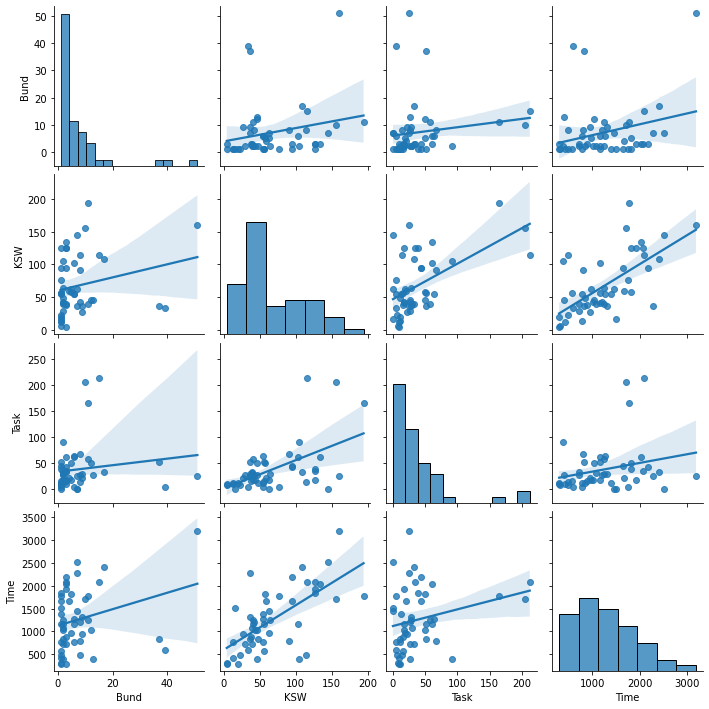

In [9]:
import seaborn as sns 
sns.pairplot(bus_data, kind = "reg")

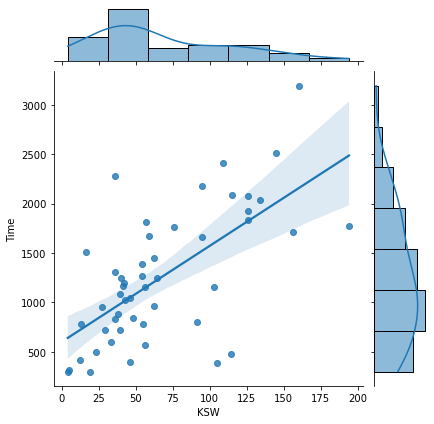

In [10]:
sns.jointplot(x= "KSW" , y = "Time" , data= bus_data, kind="reg")

# ML 

In [11]:
#manual encoding
bus_data.replace({'Land':{'BRD':0, 'POLEN':1, 'FR':2 , "SCHWEIZ":3 , "ÖSTERREICH":4 , "ITALIEN":5, "BELGIEN":6 , "Schweden":7 , "Vorfuehrbus":8, "Luxemburg":9 }}, inplace=True)
bus_data.replace({"Referance": {'NO':0 , "YES" : 1 }}, inplace=True)

In [12]:
bus_data.head()

,Referance,Bund,KSW,Task,Land,Time
0,0,1,56,52,0,1160
1,0,9,36,28,1,1310
2,1,6,55,4,2,780
3,0,1,16,0,8,1510
4,0,1,23,7,0,495


In [13]:
X = bus_data.drop(["Time"], axis=1)
y = bus_data["Time"]

print("Shape of X is: ",X.shape)
print("Shape of y is: ",y.shape)

Shape of X is:  (50, 5)
Shape of y is:  (50,)


In [14]:
X

,Referance,Bund,KSW,Task,Land
0,0,1,56,52,0
1,0,9,36,28,1
2,1,6,55,4,2
3,0,1,16,0,8
4,0,1,23,7,0
5,0,5,62,18,0
6,0,6,54,63,2
7,0,2,39,30,2
8,1,51,160,25,2
9,0,3,126,34,3


In [15]:
y

0     1160
1     1310
2      780
3     1510
4      495
5      965
6     1271
7     1080
8     3194
9     2080
10    1930
11    1710
12    2280
13    1250
14    1200
15     830
16     600
17     400
18    1765
19     320
20    1170
21     880
22     800
23     780
24     720
25     840
26    1670
27    1810
28     570
29    1390
30    1250
31    1040
32    1830
33     390
34    2410
35    1660
36     420
37    2088
38     480
39    1025
40    1775
41    2035
42    1155
43    2180
44     720
45     300
46     950
47     300
48    2510
49    1450
Name: Time, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (15, 5)
X_train shape: (35, 5)
y_test shape:  (15,)
y_train shape: (35,)


In [17]:
X_train

,Referance,Bund,KSW,Task,Land
6,0,6,54,63,2
41,0,3,134,61,3
46,0,9,27,22,9
47,0,3,4,9,0
15,0,37,36,52,0
9,0,3,126,34,3
16,0,39,33,4,0
24,0,3,39,33,4
34,1,17,109,32,4
31,0,12,46,49,0


In [18]:
X_test

,Referance,Bund,KSW,Task,Land
13,0,11,40,58,1
39,0,2,43,17,0
30,0,2,64,28,2
45,0,1,19,11,0
17,0,13,46,27,2
48,0,7,145,0,3
26,0,4,59,21,5
25,0,2,48,11,0
32,0,1,126,39,3
19,0,1,5,8,0


In [19]:
y_test

13    1250
39    1025
30    1250
45     300
17     400
48    2510
26    1670
25     840
32    1830
19     320
12    2280
4      495
37    2088
8     3194
3     1510
Name: Time, dtype: int64

In [20]:
y_train

6     1271
41    2035
46     950
47     300
15     830
9     2080
16     600
24     720
34    2410
31    1040
0     1160
44     720
27    1810
33     390
5      965
29    1390
11    1710
36     420
1     1310
21     880
2      780
43    2180
35    1660
23     780
40    1775
10    1930
22     800
18    1765
49    1450
20    1170
7     1080
42    1155
14    1200
28     570
38     480
Name: Time, dtype: int64

In [21]:
X_train

,Referance,Bund,KSW,Task,Land
6,0,6,54,63,2
41,0,3,134,61,3
46,0,9,27,22,9
47,0,3,4,9,0
15,0,37,36,52,0
9,0,3,126,34,3
16,0,39,33,4,0
24,0,3,39,33,4
34,1,17,109,32,4
31,0,12,46,49,0


In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[-0.45485883, -0.09690167, -0.34712233,  0.5573653 , -0.08333333],
       [-0.45485883, -0.44775254,  1.50419675,  0.50966901,  0.33333333],
       [-0.45485883,  0.2539492 , -0.97194252, -0.42040879,  2.83333333],
       [-0.45485883, -0.44775254, -1.50419675, -0.73043473, -0.91666667],
       [-0.45485883,  3.52855733, -0.76366912,  0.29503567, -0.91666667],
       [-0.45485883, -0.44775254,  1.31906484, -0.13423101,  0.33333333],
       [-0.45485883,  3.76245791, -0.83309359, -0.84967547, -0.91666667],
       [-0.45485883, -0.44775254, -0.69424466, -0.15807916,  0.75      ],
       [ 2.19848433,  1.18955152,  0.92565954, -0.18192731,  0.75      ],
       [-0.45485883,  0.60480007, -0.53225424,  0.22349122, -0.91666667],
       [-0.45485883, -0.68165312, -0.30083935,  0.29503567, -0.91666667],
       [-0.45485883, -0.56470283, -0.92565954, -0.30116805, -0.91666667],
       [-0.45485883, -0.21385196, -0.27769786,  0.24733937,  1.16666667],
       [-0.45485883, -0.56470283,  0.8

In [24]:
X_test

array([[-0.45485883,  0.48784978, -0.67110317,  0.43812456, -0.5       ],
       [-0.45485883, -0.56470283, -0.6016787 , -0.53964954, -0.91666667],
       [-0.45485883, -0.56470283, -0.11570744, -0.2773199 , -0.08333333],
       [-0.45485883, -0.68165312, -1.15707443, -0.68273843, -0.91666667],
       [-0.45485883,  0.72175036, -0.53225424, -0.30116805, -0.08333333],
       [-0.45485883,  0.02004862,  1.75875313, -0.94506806,  0.33333333],
       [-0.45485883, -0.33080225, -0.23141489, -0.44425694,  1.16666667],
       [-0.45485883, -0.56470283, -0.48597126, -0.68273843, -0.91666667],
       [-0.45485883, -0.68165312,  1.31906484, -0.01499026,  0.33333333],
       [-0.45485883, -0.68165312, -1.48105526, -0.75428288, -0.91666667],
       [-0.45485883,  0.02004862, -0.76366912, -0.34886435, -0.91666667],
       [-0.45485883, -0.68165312, -1.06450847, -0.77813102, -0.91666667],
       [-0.45485883,  0.95565094,  1.06450847,  4.11073946, -0.91666667],
       [ 2.19848433,  5.16586139,  2.1

In [25]:
from sklearn.linear_model import LogisticRegression

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))

MAE:  480.5665018574571
MSE:  390973.34008441877


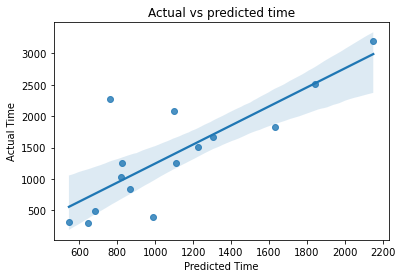

In [27]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Time")
plt.ylabel('Actual Time')
plt.title("Actual vs predicted time")
plt.show()

In [28]:
pred

array([ 824.01064   ,  819.67722549, 1109.16383436,  645.74393695,
        990.25979962, 1841.49756318, 1304.57886491,  866.07731487,
       1633.33460694,  544.38544712,  762.35569187,  681.70999793,
       1100.27543547, 2150.51969255, 1226.26541386])

In [29]:
y_test

13    1250
39    1025
30    1250
45     300
17     400
48    2510
26    1670
25     840
32    1830
19     320
12    2280
4      495
37    2088
8     3194
3     1510
Name: Time, dtype: int64

In [30]:
Referance = int(input("Enter Referance: "))


Enter Referance:  0


In [31]:
Bund = int(input("Enter Bund: "))


Enter Bund:  1


In [32]:
KSW = int(input("Enter KSW: "))

Enter KSW:  54


In [33]:
Task = int(input("Enter Task: "))

Enter Task:  12


In [34]:
Land = int(input("Enter Land BRD:0, POLEN:1 , FR:2 , SCHWEIZ:3 , ÖSTERREICH:4 , ITALIEN:5, BELGIEN:6 , Schweden:7 , Vorfuehrbus:8, Luxemburg:9 "))

Enter Land BRD:0, POLEN:1 , FR:2 , SCHWEIZ:3 , ÖSTERREICH:4 , ITALIEN:5, BELGIEN:6 , Schweden:7 , Vorfuehrbus:8, Luxemburg:9  5


In [35]:
ar = [[Referance,Bund,KSW,Task,Land]]

In [36]:
ar = scaler.transform(ar)

In [37]:
prediction = model.predict(ar)

In [38]:
print("Referance value:",Referance)
print("Bund value:",Bund)
print("KSW value:",KSW)
print("Task value:",Task)
print("Land value:",Land)
print("Prediction Time : {}".format(prediction))

Referance value: 0
Bund value: 1
KSW value: 54
Task value: 12
Land value: 5
Prediction Time : [1275.57952108]
